In [1]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns


In [2]:
# Load the Titanic dataset
data = pd.read_csv('Titanic_Train_Dataset.csv')

In [3]:
# Drop irrelevant features
data = data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)

In [4]:
# Fill missing values in 'Age' column with the median
data['Age'].fillna(data['Age'].median(), inplace=True)

In [5]:
# Convert 'Sex' and 'Survived' features to numerical using label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])
data['Survived'] = le.fit_transform(data['Survived'])

In [6]:
# Create feature and target arrays
X = data.drop('Survived', axis=1)
y = data['Survived']

In [7]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Train the model using Support Vector Machine (SVM)
svm = SVC(probability=True)
svm.fit(X_train, y_train)


SVC(probability=True)

In [9]:
# Predict the probability of survival for each passenger in the testing set
y_prob = svm.predict_proba(X_test)[:,1]

In [10]:
# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, y_prob.round())
precision = precision_score(y_test, y_prob.round())
recall = recall_score(y_test, y_prob.round())
f1 = f1_score(y_test, y_prob.round())

In [11]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.664804469273743
Precision: 0.7692307692307693
Recall: 0.2702702702702703
F1 Score: 0.4


<AxesSubplot: xlabel='Age'>

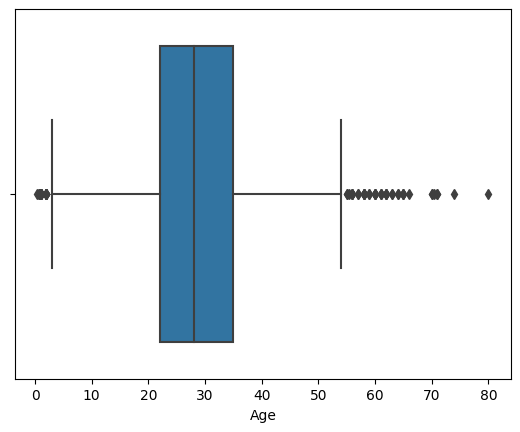

In [12]:
# Create a boxplot of the 'Age' feature
sns.boxplot(x=data['Age'])


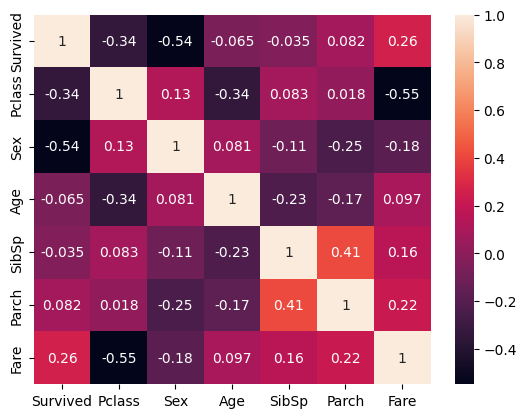

In [13]:
# Visualize the correlation between features
dataplot = sns.heatmap(data.corr(), cmap="rocket", annot=True)
